In [82]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression, Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import SGDRegressor
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
from scipy import stats
from sklearn import linear_model
import statsmodels.api as sm
%matplotlib inline

In [83]:
# Load the data into a pandas DataFrame
data = pd.read_csv('AmesHousing.csv', delimiter=',')

In [84]:
data.head()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [85]:
# Step 1: Identify missing values
missing_values = data.isnull().sum()
print("Missing values:\n", missing_values)

Missing values:
 Order               0
PID                 0
MS SubClass         0
MS Zoning           0
Lot Frontage      490
                 ... 
Mo Sold             0
Yr Sold             0
Sale Type           0
Sale Condition      0
SalePrice           0
Length: 82, dtype: int64


In [86]:
data.describe

<bound method NDFrame.describe of       Order        PID  MS SubClass MS Zoning  Lot Frontage  Lot Area Street  \
0         1  526301100           20        RL         141.0     31770   Pave   
1         2  526350040           20        RH          80.0     11622   Pave   
2         3  526351010           20        RL          81.0     14267   Pave   
3         4  526353030           20        RL          93.0     11160   Pave   
4         5  527105010           60        RL          74.0     13830   Pave   
...     ...        ...          ...       ...           ...       ...    ...   
2925   2926  923275080           80        RL          37.0      7937   Pave   
2926   2927  923276100           20        RL           NaN      8885   Pave   
2927   2928  923400125           85        RL          62.0     10441   Pave   
2928   2929  924100070           20        RL          77.0     10010   Pave   
2929   2930  924151050           60        RL          74.0      9627   Pave   

     

In [87]:
# Remove unecessary columns. In this case, we are only interested in Lot Size and Sales Price; we remove all other columns.
# Drop Order to Lot Frontage
data.drop(data.iloc[:, 0:5], inplace=True, axis=1)


In [88]:
# Drop Street to Sale Condition
data.drop(data.iloc[:, 1:76], inplace=True, axis=1)

In [89]:
# Dataframe for project
data.head()

,Lot Area,SalePrice
0,31770,215000
1,11622,105000
2,14267,172000
3,11160,244000
4,13830,189900


In [90]:
data.describe()

,Lot Area,SalePrice
count,2930.000000,2930.000000
mean,10147.921843,180796.060068
std,7880.017759,79886.692357
min,1300.000000,12789.000000
25%,7440.250000,129500.000000
50%,9436.500000,160000.000000
75%,11555.250000,213500.000000
max,215245.000000,755000.000000


In [91]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Lot Area   2930 non-null   int64
 1   SalePrice  2930 non-null   int64
dtypes: int64(2)
memory usage: 45.9 KB


We can see that there are 2,930 properites used to created this dataset.

The average lot size is: 10,147 sqft.

The average sale price is: $180,796.

x shape:  (2930,)
y shape:  (2930,)


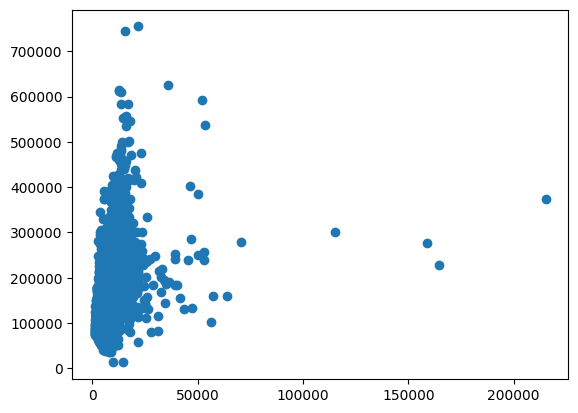

In [92]:
#Let's look for and remove significant outliers that could affect our regression model.

# Assign x and y values from the dataframe
x = data['Lot Area'].values
y = data['SalePrice'].values

# Let's see what the data looks like raw
print('x shape: ', x.shape)
print('y shape: ', y.shape)
plt.scatter(x,y)
plt.show()

In [93]:
# Remove outliers, defined as lot sizes >3 standard deviations above the mean
cleaned_data = data[(np.abs(stats.zscore(data)) < 3).all(axis=1)]

x shape:  (2859,)
y shape:  (2859,)


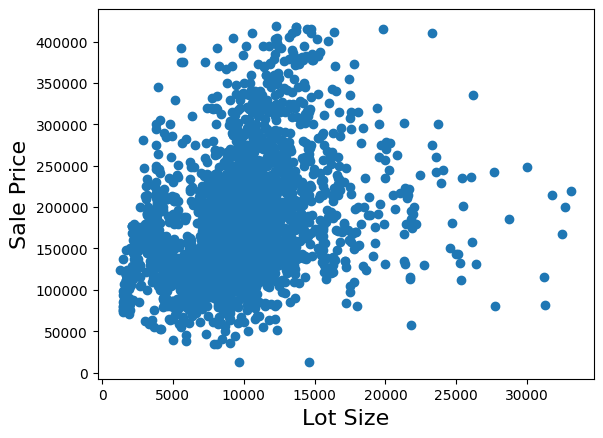

In [94]:
# Assigned values to x and y axis to develop a scatter plot
x = cleaned_data['Lot Area'].values
y = cleaned_data['SalePrice'].values

print('x shape: ', x.shape)
print('y shape: ', y.shape)
plt.scatter(x,y)
plt.xlabel('Lot Size', size=16)
plt.ylabel('Sale Price', size=16)
plt.show()

In [95]:
#Build our testing and training sets for our model

# Let's put x-axis array into a appropriate shape for use by pyplot
x = x.reshape(-1,1)
print('x shape: ', x.shape)
x

x shape:  (2859, 1)


array([[31770],
       [11622],
       [14267],
       ...,
       [10441],
       [10010],
       [ 9627]])

In [96]:
# Create out test/train split
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, test_size=0.2, random_state=100)
print(f"x_train shape {x_train.shape}")
print(f"y_train shape {y_train.shape}")
print("")
print(f"x_test shape {x_test.shape}")
print(f"y_test shape {y_test.shape}")
print("")
print(f"y_test is: {y_test}")

x_train shape (2287, 1)
y_train shape (2287,)

x_test shape (572, 1)
y_test shape (572,)

y_test is: [133500 320000 120000 129000 128200 153000 280000 281213 166000 108480
 175900 180500 213000  91000 127000 186000 183900 112000 252000 197600
 130000  39300 105500 170000 161500 244400 146000 156000 153000 206000
 271000 185500 372500 124900 102776 142000 113700 209500 319900 161900
 143195 157500 165500 100000 130000 207500 173000 135000 241600  94900
 200000 124000 167800 263000 161000  89500 149900 191000 239000 207000
 157500 232500 145250 140000 175900 135000 330000 149900 159000 235128
 145000  55000 157000 122500 163000 307000 295493 155000 204750 256000
 140000 162000 200000 179200 104000 207500 250000 154000 188500 175000
  98000 179900 145000 176485 130500 202500 177000 105000 109900 190000
 113000 159434 233170 226500 148325 257000 137000 184000 157000 138000
 137900 133000 170440 119000 328000 119900  78500 375000 150000 114000
 205000 132000 186500 156500 167500 118500 1800

In [97]:
print(len(train_test_split(x,y, train_size=0.8, test_size=0.2, random_state=100)))

4


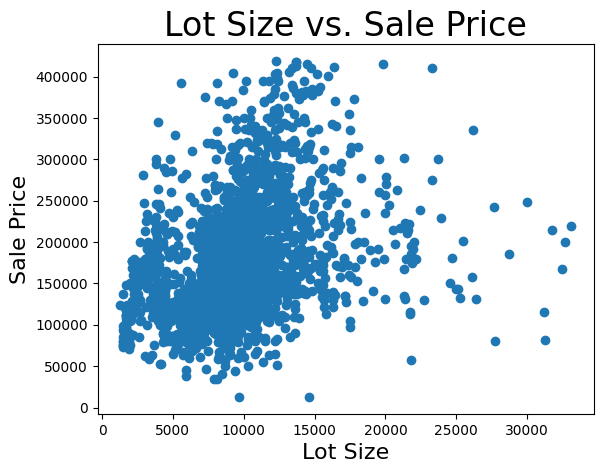

In [98]:
# Plot the data
plt.scatter(x_train, y_train)
plt.title('Lot Size vs. Sale Price', size=24)
plt.xlabel("Lot Size", size=16)
plt.ylabel('Sale Price', size=16)
plt.show()

**Linear Regression**

In [99]:
# Create instance of LinearRegression class
linear_reg = LinearRegression()

# Invoke lm.fit() to find the "best fit" for our training data
linear_reg.fit(x_train, y_train)

# Now we test out line of best fit by invoking .predict() on our test data.
# y_predict represents PREDICTIONS from our linear regression model.
linear_reg_predictions = linear_reg.predict(x_test)

linear_reg_mse = mean_squared_error(y_test, linear_reg_predictions)

print("Linear Regression Predictions:", linear_reg_predictions)
print("Linear Regression MSE:", linear_reg_mse)


Linear Regression Predictions: [156559.14574174 232104.59592447 177884.73833896 154153.09268085
 181744.80907693 174243.92423483 189597.65851546 193371.18058218
 162127.11025914 151452.7741377  177994.36665588 175686.40208908
 174376.63219742 129504.03110744 163454.18988505 180417.72945102
 141845.8716284  266499.03788119 182552.59667531 176401.87110479
 141649.69464022 149144.8095709  129988.70366647 223692.06507849
 176782.68525831 259292.41852136 195719.53452889 198581.41059172
 164740.88013104 159311.39348765 196833.12743237 170914.68534723
 188634.08330882 155260.91567291 170562.72075079 175686.40208908
 132169.73018209 165260.17215857 166656.49072148 165323.64118416
 173470.75610495 180533.12767936 189245.69391902 129988.70366647
 169414.50837881 149502.54407875 133381.41157966 157799.67669639
 209249.97680175 129504.03110744 180198.47281717 175040.17201038
 171751.32250269 188160.95057263 181133.19846673 172224.45523888
 183920.06568114 138655.1106148  215844.98555138 171128.172

**Polynomial Regression**

In [100]:
poly_features = PolynomialFeatures(degree=2)
X_poly = poly_features.fit_transform(x_train)
poly_reg = LinearRegression()
poly_reg.fit(X_poly, y_train)
X_test_poly = poly_features.transform(x_test)
poly_reg_predictions = poly_reg.predict(X_test_poly)
poly_reg_mse = mean_squared_error(y_test, poly_reg_predictions)
print("Polynomial Regression Predictions:", poly_reg_predictions)
print("Polynomial Regression MSE:", poly_reg_mse)

Polynomial Regression Predictions: [153963.36554656 222572.50451372 182786.85794701 150244.4059302
 187209.04834809 178392.51856161 195453.25514879 199056.0491422
 162206.49724404 145957.84497575 182915.81320659 180159.47324796
 178556.499861   106691.38970809 164096.35088574 185716.20389925
 129740.66445194 222885.46487164 188103.63321753 181023.25645341
 129393.77544988 142199.589073   107643.54804865 219550.950369
 181479.59789303 224422.21786728 201180.58576569 203647.75976811
 165901.18383325 158101.3253553  202156.51648347 174184.47050196
 194495.9469229  151968.49428199 173729.00306437 180159.47324796
 111880.71422442 166621.92219164 168538.03311655 166709.70995484
 177431.42145113 185847.15995104 195105.34012069 107643.54804865
 172229.04716237 142787.82421362 114201.0767971  155843.82009205
 211664.45423786 106691.38970809 185466.78734031 179372.08559544
 175259.00660188 194020.3323869  186524.6203584  175861.60744956
 189593.71146568 124020.47640062 215689.06097104 174459.750

**Ridge Regression**

In [101]:
ridge_reg = Ridge(alpha=0.5)
ridge_reg.fit(x_train, y_train)
ridge_reg_predictions = ridge_reg.predict(x_test)
ridge_reg_mse = mean_squared_error(y_test, ridge_reg_predictions)
print("Ridge Regression Predictions:", ridge_reg_predictions)
print("Ridge Regression MSE:", ridge_reg_mse)

Ridge Regression Predictions: [156559.14574199 232104.5959237  177884.73833892 154153.09268114
 181744.80907684 174243.92423485 189597.65851526 193371.18058193
 162127.11025932 151452.77413802 177994.36665584 175686.40208908
 174376.63219743 129504.03110806 163454.18988521 180417.72945095
 141845.87162885 266499.03787995 182552.59667521 176401.87110477
 141649.69464068 149144.80957125 129988.70366708 223692.06507783
 176782.68525829 259292.41852022 195719.53452861 198581.41059141
 164740.88013118 159311.39348786 196833.12743208 170914.68534728
 188634.08330864 155260.91567319 170562.72075085 175686.40208908
 132169.73018268 165260.1721587  166656.4907216  165323.64118429
 173470.75610498 180533.12767929 189245.69391883 129988.70366708
 169414.50837889 149502.5440791  133381.41158023 157799.67669663
 209249.97680129 129504.03110806 180198.47281711 175040.17201038
 171751.32250274 188160.95057245 181133.19846665 172224.45523892
 183920.06568102 138655.11061529 215844.98555083 171128.1720

**Lasso Regression**

In [102]:
lasso_reg = Lasso(alpha=0.5)
lasso_reg.fit(x_train, y_train)
lasso_reg_predictions = lasso_reg.predict(x_test)
lasso_reg_mse = mean_squared_error(y_test, lasso_reg_predictions)
print("Lasso Regression Predictions:", lasso_reg_predictions)
print("Lasso Regression MSE:", lasso_reg_mse)

Lasso Regression Predictions: [156559.14584245 232104.59561808 177884.73832475 154153.09279453
 181744.80904192 174243.92424024 189597.65843813 193371.18048451
 162127.11032985 151452.77426593 177994.36664108 175686.40208672
 174376.63220212 129504.03135395 163454.1899486  180417.72942316
 141845.8718084  266499.03738944 182552.59663594 176401.87109857
 141649.69482128 149144.80971157 129988.70391037 223692.06481743
 176782.68525004 259292.41806845 195719.53441857 198581.41046598
 164740.88018766 159311.39357353 196833.12731605 170914.68537058
 188634.08323668 155260.91578062 170562.72077604 175686.40208672
 132169.73041424 165260.17221239 166656.49076778 165323.64123764
 173470.75611453 180533.12765088 189245.69384359 129988.70391037
 169414.50841024 149502.54421749 133381.41180528 157799.67679042
 209249.97661852 129504.03135395 180198.47279049 175040.1720115
 171751.32252153 188160.95050304 181133.19843501 172224.45525518
 183920.0656344  138655.11081199 215844.9853326  171128.17209

**Decision Tree Regression**

In [103]:
dt_reg = DecisionTreeRegressor()
dt_reg.fit(x_train, y_train)
dt_reg_predictions = dt_reg.predict(x_test)
dt_reg_mse = mean_squared_error(y_test, dt_reg_predictions)
print("Decision Tree Regression Predictions:", dt_reg_predictions)
print("Decision Tree Regression MSE:", dt_reg_mse)

Decision Tree Regression Predictions: [120750.         176000.         195500.         106900.
 279500.         143780.         218689.         153900.
 134900.         112128.57142857 179175.         146704.6875
 137500.         121000.         184000.         196500.
 186586.         132250.         166750.         193500.
 170000.         100416.66666667 103467.85714286 183950.
  91000.         228500.         146700.         110000.
 171500.         196426.33333333 290000.         190000.
 374000.         114900.          86377.         146704.6875
 106000.         129000.         180000.         135000.
 204500.         224707.25       235000.         103467.85714286
 119000.         161000.         150411.11111111 128500.
 169000.         121000.         301000.         187000.
 119000.         290000.         341000.         138376.22727273
 334000.         172765.83333333 340000.         180500.
 145000.         141166.66666667 145900.         301000.
 129500.         320000.  

**Random Forest Regression**

In [104]:
rf_reg = RandomForestRegressor()
rf_reg.fit(x_train, y_train)
rf_reg_predictions = rf_reg.predict(x_test)
rf_reg_mse = mean_squared_error(y_test, rf_reg_predictions)
print("Random Forest Regression Predictions:", rf_reg_predictions)
print("Random Forest Regression MSE:", rf_reg_mse)

Random Forest Regression Predictions: [139414.83333333 203200.         185675.         124603.
 266159.         142823.36767677 223743.36738095 190299.4475
 145783.         113259.34622045 180063.43271598 147625.75186266
 172719.26587302 110947.5        181277.25184162 184712.23333333
 187954.729      145980.         166801.02380952 195069.
 173812.78766667 101018.56429681 103400.32067345 183670.7
 135394.         238815.         146285.84722222 132996.66666667
 166833.83333333 194488.14445238 227145.         189322.25409524
 309991.8        105394.45454545  86581.45640476 147625.75186266
 112652.25       140549.42142857 156409.97916667 136175.89126984
 191672.5        222650.10618651 253810.         103400.32067345
 125233.75833333 165073.         150288.09522977 139925.69
 188505.         110947.5        260040.         165310.
 131925.         236750.47222222 275454.75       139080.32873238
 293537.25       171791.72525086 292152.32       177758.23809524
 147500.         147724.4166

**Gradient Boosting Regression**

In [105]:
gb_reg = GradientBoostingRegressor()
gb_reg.fit(x_train, y_train)
gb_reg_predictions = gb_reg.predict(x_test)
gb_reg_mse = mean_squared_error(y_test, gb_reg_predictions)
print("Gradient Boosting Regression Predictions:", gb_reg_predictions)
print("Gradient Boosting Regression MSE:", gb_reg_mse)

Gradient Boosting Regression Predictions: [138313.49979221 209269.91888005 180917.36360892 126227.16696005
 201164.48819518 173989.56019051 213064.38652969 218850.12023581
 167189.86340734 132804.22931297 180917.36360892 171397.5996938
 173989.56019051 106292.32762927 157185.14104739 183208.47424014
 180125.82367311 170397.02052852 174575.32530825 173856.680382
 168100.82092585 141754.36067847 106292.32762927 220160.36248411
 173856.680382   214582.29004518 202079.61499313 204321.69329719
 157185.14104739 150369.91925707 211702.85310135 174656.80885034
 211238.33354703 124112.9267776  147451.39443958 171397.5996938
 111070.09450325 157185.14104739 155322.71680561 157185.14104739
 177751.09292629 183208.47424014 213064.38652969 106292.32762927
 141180.68557886 161014.32396958 146636.43797496 138313.49979221
 213161.48469891 106292.32762927 183208.47424014 173989.56019051
 160258.92726168 201752.85759588 213761.78819518 160258.92726168
 214844.00298055 161748.26961467 226112.34493714 161

**Support Vector Regression**

In [106]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(x_train)
X_test_scaled = scaler.transform(x_test)
svr_reg = SVR()
svr_reg.fit(X_train_scaled, y_train)
svr_reg_predictions = svr_reg.predict(X_test_scaled)
svr_reg_mse = mean_squared_error(y_test, svr_reg_predictions)
print("Support Vector Regression Predictions:", svr_reg_predictions)
print("Support Vector Regression MSE:", svr_reg_mse)

Support Vector Regression Predictions: [158918.07888227 159218.42448895 159182.32187294 158913.64869192
 159243.19984308 159120.93138369 159334.76461819 159358.45540102
 158951.69023067 158915.15807169 159184.13586138 159145.39366749
 159123.17880362 159038.35072239 158964.57033294 159223.08867969
 158958.75989107 159158.74335185 159254.90912796 159157.49905709
 158960.0102238  158921.10476816 159035.49324969 159253.36580147
 159163.91604363 159165.36338974 159366.34973491 159369.42512515
 158978.74014738 158930.52030733 159368.3611734  159065.73456309
 159326.49590097 158914.97093023 159060.11873456 159145.39366749
 159022.19734883 158984.90514794 159002.67254406 158985.67561973
 159107.87794899 159224.87690014 159331.84834787 159035.49324969
 159042.23058002 158919.93575488 159014.52867064 158922.68441289
 159334.87322988 159038.35072239 159219.67195161 159134.4314421
 159079.2948775  159322.10912933 159234.05818134 159087.07759393
 159273.6863073  158979.68750668 159296.66160156 159

**Gradient Descent**

In [107]:
gd_reg = make_pipeline(StandardScaler(), SGDRegressor())
gd_reg.fit(x_train, y_train)
gd_reg_predictions = gd_reg.predict(x_test)
gd_reg_mse = mean_squared_error(y_test, gd_reg_predictions)
print("Gradient Descent Regression Predictions:", gd_reg_predictions)
print("Gradient Descent Regression MSE:", gd_reg_mse)

Gradient Descent Regression Predictions: [155949.06567036 233088.52930042 177724.62952713 153492.24474821
 181666.14798497 174006.99403102 189684.69300907 193537.83661359
 161634.51456695 150734.94932479 177836.571008   175479.90825293
 174142.50213944 128323.08652415 162989.59565111 180311.06690081
 140925.34060684 268208.69600772 182490.97994924 176210.473707
 140725.02427266 148378.28656973 128817.98570271 224498.49355822
 176599.32306159 260850.01655504 195935.74096687 198858.00278315
 164303.43513705 158759.38600577 197072.83074619 170607.50800684
 188700.78630883 154623.44287064 170248.1169367  175479.90825293
 131045.03200625 164833.68425694 166259.46522376 164898.49248271
 173217.51200807 180428.90003856 189325.30193892 128817.98570271
 169075.67721605 148743.56929676 132282.27995265 157215.77190121
 209751.67636842 128323.08652415 180087.18393908 174820.04268152
 171461.79825555 188217.67044404 181041.63235488 171944.91412034
 183887.30263162 137667.25434797 216485.84019101 17

**Performance** (A lower MSE indicates better performance)

In [108]:
print("Linear Regression MSE:", linear_reg_mse)
print("Polynomial Regression MSE:", poly_reg_mse)
print("Ridge Regression MSE:", ridge_reg_mse)
print("Lasso Regression MSE:", lasso_reg_mse)
print("Decision Tree Regression MSE:", dt_reg_mse)
print("Random Forest Regression MSE:", rf_reg_mse)
print("Gradient Boosting Regression MSE:", gb_reg_mse)
print("Support Vector Regression MSE:", svr_reg_mse)
print("Gradient Descent Regression MSE:", gd_reg_mse)

Linear Regression MSE: 3881074195.964924
Polynomial Regression MSE: 3846116271.744318
Ridge Regression MSE: 3881074195.9666705
Lasso Regression MSE: 3881074196.6569467
Decision Tree Regression MSE: 6177570870.120154
Random Forest Regression MSE: 4706024687.16734
Gradient Boosting Regression MSE: 3621159270.700391
Support Vector Regression MSE: 4736168211.669502
Gradient Descent Regression MSE: 3878420654.444676


In [109]:
# Initialize the best MSE variable
best_mse = float('inf') # It should be an initial value that is higher than the maximum possible MSE to ensure that the first model's MSE is assigned correctly.
best_model = None

# Compare the MSE values and find the best model
if linear_reg_mse < best_mse:
    best_mse = linear_reg_mse
    best_model = "Linear Regression"

if poly_reg_mse < best_mse:
    best_mse = poly_reg_mse
    best_model = "Polynomial Regression"

if ridge_reg_mse < best_mse:
    best_mse = ridge_reg_mse
    best_model = "Ridge Regression"

if lasso_reg_mse < best_mse:
    best_mse = lasso_reg_mse
    best_model = "Lasso Regression"

if dt_reg_mse < best_mse:
    best_mse = dt_reg_mse
    best_model = "Decision Tree Regression"

if rf_reg_mse < best_mse:
    best_mse = rf_reg_mse
    best_model = "Random Forest Regression"

if gb_reg_mse < best_mse:
    best_mse = gb_reg_mse
    best_model = "Gradient Boosting Regression"

if svr_reg_mse < best_mse:
    best_mse = svr_reg_mse
    best_model = "Support Vector Regression"

if gd_reg_mse < best_mse:
    best_mse = gd_reg_mse
    best_model = "Gradient Descent Regression"

print("The best model is:", best_model)


The best model is: Gradient Boosting Regression
